In [18]:
import processing
import modeling
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style('darkgrid')
random.seed(seed=43)
reload(processing)
import numpy as np

import functions as f

from sklearn.linear_model import Ridge

In [86]:
import_cols = ['id', 'year', 'age',
               'sex', 'race', 'region', 'educ', 'relig']
# reader = pd.read_stata(f.data_loc('GSS7212_R2.DTA'), iterator=True, chunksize=1)
# gssFCols = reader.get_chunk(1)

gss = f.load_dta(f.data_loc('GSS7212_R2.DTA'), columns=import_cols, chunksize=None)
gss = gss[gss.year>1995]
prej = pd.read_csv("composites/genderVar.csv")
gss = gss.merge(prej, 'left', on=["year","id"])

# change age to number (89+ just coded as 89)
gss.age = gss.age.astype('category').cat.codes + 18
age_mean = gss.age.mean()
# gss.age = gss.age.fillna(age_mean)
# gss.age = (gss.age - gss.age.mean())/gss.age.std()


    state_info = pd.read_csv('data/gssstate7304.csv')

    gss = pd.merge(gss, state_info, on=["id", "year"])

# gss = gss.drop(['race', 'region', 'relig'], axis=1)


Loaded 57061 rows...
Done!


# Independent measures and gender composite (with bootstrap CIs)

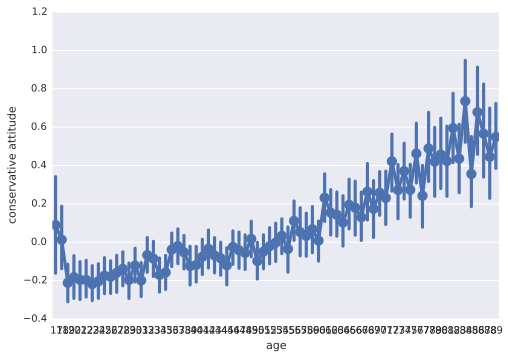

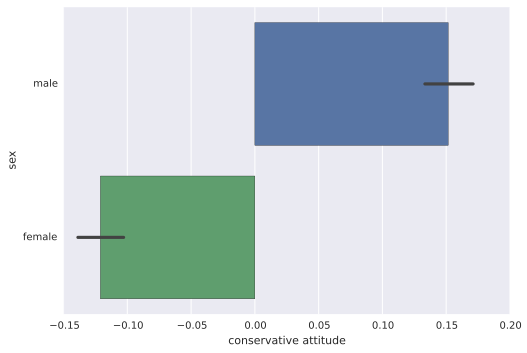

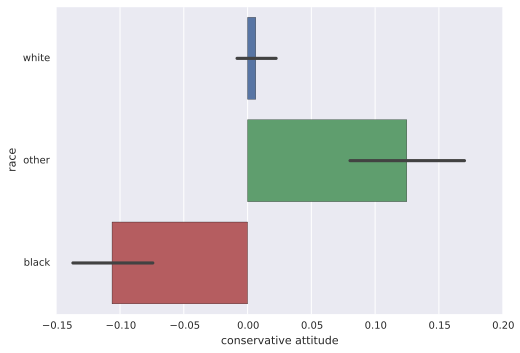

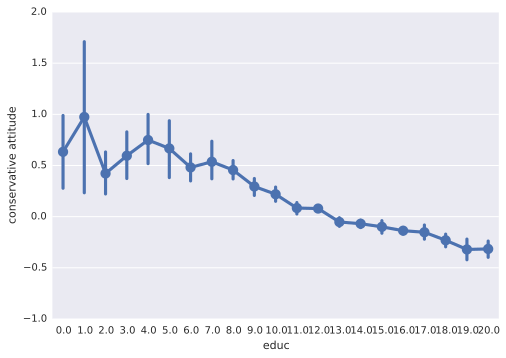

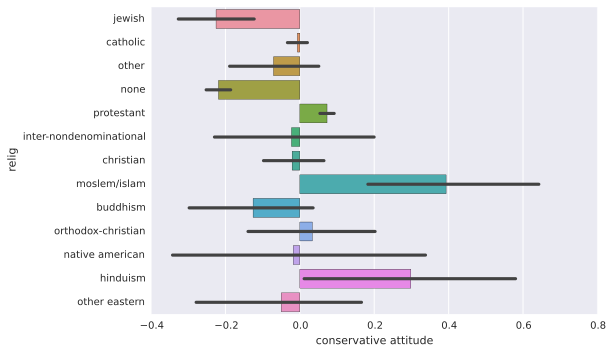

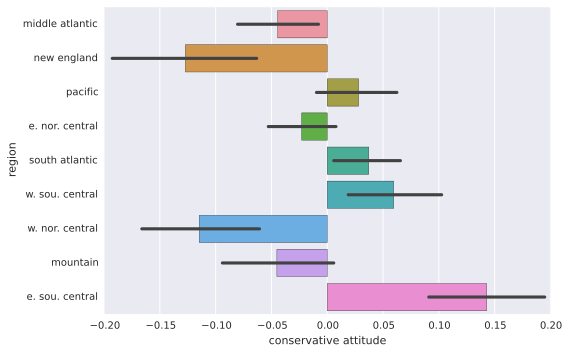

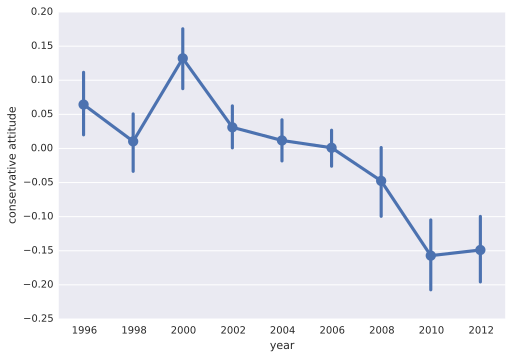

In [165]:
relevantCols = ['age',
               'sex', 'race', 'educ', 'relig','region','year']
sns.set_style('darkgrid')

for col in  relevantCols:
    grouped = gss.groupby(col).agg([np.mean,np.std])
    
    if gss[col].dtype == 'O':
#         sns.barplot(grouped.genderValue['mean'],grouped.index,orient='h',ci=grouped.genderValue['std'])
        sns.barplot(y=col, x="genderValue",data=gss, orient = 'h')
        plt.ylabel(col)
        plt.xlabel('conservative attitude')
    else:
#         plt.plot(grouped.index,grouped.genderValue['mean'])
        sns.pointplot(x=col, y="genderValue", data=gss,marker='')
        plt.xlabel(col)
        plt.ylabel('conservative attitude')
    plt.show()

# Some correlations.. (possibly more interesting once interaction terms are added)

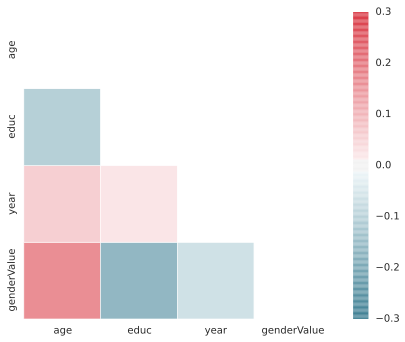

In [161]:
relevantCols = ['age', 'educ', 'year','genderValue']
sns.set(style="white")

# Compute the correlation matrix
corr = gss[relevantCols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5)

In [163]:

corr = gss[relevantCols].corr()
print corr

                  age      educ      year  genderValue
age          1.000000 -0.104514  0.058524     0.161868
educ        -0.104514  1.000000  0.019303    -0.163697
year         0.058524  0.019303  1.000000    -0.062222
genderValue  0.161868 -0.163697 -0.062222     1.000000
